#### Attemping a multivariate least squares fit

In [1]:
from gradient_descent_ols import Vector, num_friends_good, daily_minutes_good, add, scalar_multiply, plot_loss, ols
from typing import List, Tuple
import random

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
xs = num_friends_good
ys = daily_minutes_good

In [3]:
def dot(v1: Vector, v2: Vector) -> float:
    """Computes v1_1*v2_1 + v1_2*v2_2 ..."""
    assert len(v1)==len(v2)
    return sum(v1_i * v2_i for v1_i, v2_i in zip(v1,v2))

def vector_sum(vectors:List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # check that vector is not empty
    assert vectors, "no vectors provided!"
    # check that vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors) 
            for i in range(num_elements)]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Returns the mean of correspoding elements"""
    return scalar_multiply(1 /len(vectors), vector_sum(vectors))

In [4]:
assert dot([1, 2], [2, 0]) == 2
assert vector_sum([[1, 3], [1, -3]]) == [2, 0]
assert vector_mean([[1, 3], [1, -3]]) == [1, 0]

In [5]:
def add_intercept_vectors(xs: List[Vector]) -> List[Vector]:
    """add intercept 1 to xs vector"""
    return [[1] + x for x in xs]

def add_intercept(xs: Vector) -> List[Vector]:
    return [[1, x] for x in xs]


In [6]:
# predict the error per point
def predict_point(x: Vector, theta: Vector) -> float:
    return dot(x, theta)

def error_point(x: Vector, y: float, theta: Vector) -> float:
    """ Calculates the prediction error at point x"""
    return predict_point(x, theta) - y

assert error_point([1,3], 4, [1,1]) == 0

In [7]:
def sum_sq_error(data: List[List[Vector]], theta: Vector) -> float:
    """Computer sum of square error for all xs, ys pairs """
    return sum(error_point(x, y, theta) ** 2 for x, y in data)
    
def gradient(x: List[Vector], y: float, theta: Vector) -> List:
    """Calculates the gradient update for 1 point for theta """
    return scalar_multiply(error_point(x, y, theta), x)

def evaluate_gradient(data: List[List[Vector]], theta: Vector) -> float:
    """evaluates gradient for provided data structure 
    [[x_0, x_1,.., x_i],[x_0, x_1,.., x_i]] -> [y_1,y_2]"""
    return vector_mean([gradient(x, y, theta) for x, y in data]) 
    
def gradient_step(gradient: Vector, alpha: float) -> Vector:
    """ takes one gradient step"""
    return scalar_multiply(alpha, gradient)

def theta_update(theta: Vector, gradient: Vector , alpha: float) -> Vector:
    return add(theta, gradient_step(gradient, -alpha))

In [8]:
data_test = [[[1, 1], 1], [[1, 1], 1]]

In [9]:
theta = evaluate_gradient(data_test, [0, 0] )
# assert 0.985 < theta[0] < 0.995 
# assert 0.985 < theta[1] < 0.995 
theta

[-1.0, -1.0]

In [10]:
def chunks(data: Vector, chunk_size: int):
    """Yield successive chunks from data."""
    chunk_size = max(1, chunk_size)
    data_copy = data.copy()
    random.shuffle(data_copy)
    for i in range(0, len(data_copy), chunk_size):
        yield data_copy[i:i + chunk_size]
        
assert len(list(chunks(list(range(10)), 5))[0]) == 5

In [11]:
def least_squares_fit(xs: List[float], ys: List[float] , 
                       alpha: float,  epochs: int = 1000, 
                       batch_size: int = 10) -> Vector:
    """
    Find the theta that minimizes the sum of squared errors 
    assuming the model y = dot(x, theta)
    """
    data = [[x, y] for x, y in zip(xs, ys)]     # zip data structure  
    n = len(xs[0])                              # number of features
    theta = [random.random() for _ in range(n)] # random guess for theta
    m = len(xs)                                 # number trainning examples
    loss = []                                   # to plot the avg. loss per epoch
    
    for epoch in range(epochs):
        chunks_loss = []                                # for avg. loss
        for chunk in chunks(data, batch_size):
            grad = evaluate_gradient(chunk, theta)      # evaluate the gradient    
            theta = theta_update(theta, grad, alpha) # update theta 
            loss_per_chunk = (1/ (2 * m)) * sum_sq_error(chunk, theta)  # loss per chunk iter
            chunks_loss.append(loss_per_chunk)                          
        
        average_epoch_loss = sum(chunks_loss) / len(chunks_loss)       
        loss.append((epoch, average_epoch_loss))                # plot the avg per epoch
    plot_loss(loss)
    return theta

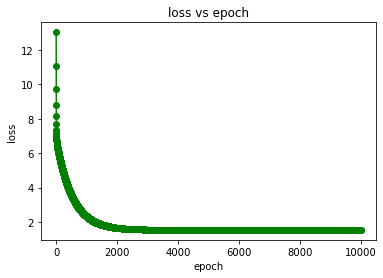

[22.948807629458205, 0.9046883604614456]

In [24]:
# i've had to look into results as previous rate was to high and nan results were generated. 
# decrease rate for a smoother loss curve
learning_rate = 0.0001
epochs = 10000
random.seed(0)

theta = least_squares_fit(add_intercept(num_friends_good), daily_minutes_good,  
                               learning_rate, epochs, 10)


assert 22.93 < theta[0] < 22.96 
assert 0.9 < theta[1] < 0.91
theta

In [25]:
theta

[22.948807629458205, 0.9046883604614456]

#### for a multivariate example

In [14]:
inputs: List[List[float]] = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]

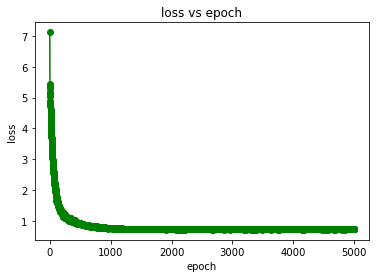

In [65]:
random.seed(0)
learning_rate = 0.001 # trial and error
epochs = 5000


theta  = least_squares_fit(inputs, daily_minutes_good, 
                            learning_rate, epochs, 10)

In [66]:
# minutes= 30.58 + 0.972 friends -1.87 work hours + 0.923 phd

assert 30.50 < theta[0] < 30.70
assert 0.96 < theta[1] < 1.1 
assert -1.89 < theta[2] < -1.80
assert 0.91 < theta[3] < 0.94
theta

[30.58711136356187, 1.0162876413707889, -1.83040502450729, 0.9263104115029371]